# Análisis Comparativo de Algoritmos de Machine Learning en la Predicción del Cáncer de Mama

![Mamografia](mammograph.jpg)

### Introducción

El cancer de mama es uno de los principales problemas de salud pública a nivel mundial
siendo la fomra de cáncer más común entre las mujeres. Según la Organizacion Mundial de la Salud (OMS),
representa aproximadamente el 25% de todos los casos de cáncer diagnosticados en mujeres. A pesar de los
avances en tratamientos y tecnologia medica, el diagnóstico temprano sigue siendo el factor más critico para
mejorar las tasas de supervivencia y la calidad de vida de las pacientes

El análisis de datos desempeña un papel fundamental en la lucha conta el cáncer de mama, permitiendo explorar patrones,
identificar factores de riesgo y desarrollar herramientas predictivas basadas en machine learning. Con tecnicas avanzadas, es posible:

1. Identificar caracteristicas clave
2. Mejorar el diagnostico temprano
3. Optimizar tratamientos personalizados 
4. Desarrollar politicas de salud publica 

Este proyecto busca explorar y analizar un conjunto de datos relacionado con el cáncer de mama, con el objetivo de extraer información relevante que apoye la toma de decisiones clínicas y de investigación. A través de técnicas de análisis estadístico y machine learning, se espera contribuir a una mejor comprensión de este problema y a la generación de soluciones innovadoras para combatirlo.

### Snakes (modelos de contorno activos)
Comenzando con un contorno inicial definido por el usuario, el límite real del núcleo celular se localiza utilizando
un modelo de contorno activo conocido como "snake". Un snake es una curva deformable que busca minimizar una función 
de energía definida a lo largo de su longitud. La función de energía se construye de manera que su valor mínimo ocurre 
cuando la curva se ajusta con precisión al límite del núcleo celular. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (LabelEncoder, 
                                   PowerTransformer,
                                   StandardScaler)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             roc_auc_score)

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA


In [2]:
df_raw = pd.read_csv('data.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


### Diccionario de Datos - Breast Cancer Wisconsin (Diagnostic) Dataset

| **Nombre de la Característica** | **Descripción**                                                                                   | **Tipo de Dato**  |
|----------------------------------|---------------------------------------------------------------------------------------------------|-------------------|
| `id`                            | Identificador único para cada muestra.                                                           | Numérico (entero) |
| `diagnosis`                     | Diagnóstico del tumor (`M` = Maligno, `B` = Benigno).                                             | Categórico (texto)|
| `radius_mean`                   | Promedio del radio (distancia media del centro al perímetro).                                     | Numérico (float)  |
| `texture_mean`                  | Promedio de la desviación estándar de los valores de escala de grises en la imagen.              | Numérico (float)  |
| `perimeter_mean`                | Promedio del perímetro de las células.                                                           | Numérico (float)  |
| `area_mean`                     | Promedio del área de las células.                                                                | Numérico (float)  |
| `smoothness_mean`               | Promedio de la suavidad (variación local en las longitudes del radio).                           | Numérico (float)  |
| `compactness_mean`              | Promedio de la compacidad (perímetro² / área - 1.0).                                             | Numérico (float)  |
| `concavity_mean`                | Promedio de la concavidad (grados de hundimiento en los contornos).                              | Numérico (float)  |
| `concave points_mean`           | Promedio de la cantidad de puntos cóncavos en los contornos.                                     | Numérico (float)  |
| `symmetry_mean`                 | Promedio de la simetría de las células.                                                          | Numérico (float)  |
| `fractal_dimension_mean`        | Promedio de la dimensión fractal ("aproximación de la línea de costa").                          | Numérico (float)  |
| `radius_se`                     | Error estándar del radio.                                                                        | Numérico (float)  |
| `texture_se`                    | Error estándar de la textura.                                                                    | Numérico (float)  |
| `perimeter_se`                  | Error estándar del perímetro.                                                                    | Numérico (float)  |
| `area_se`                       | Error estándar del área.                                                                         | Numérico (float)  |
| `smoothness_se`                 | Error estándar de la suavidad.                                                                   | Numérico (float)  |
| `compactness_se`                | Error estándar de la compacidad.                                                                 | Numérico (float)  |
| `concavity_se`                  | Error estándar de la concavidad.                                                                 | Numérico (float)  |
| `concave points_se`             | Error estándar de la cantidad de puntos cóncavos.                                               | Numérico (float)  |
| `symmetry_se`                   | Error estándar de la simetría.                                                                   | Numérico (float)  |
| `fractal_dimension_se`          | Error estándar de la dimensión fractal.                                                          | Numérico (float)  |
| `radius_worst`                  | Valor más alto del radio observado.                                                              | Numérico (float)  |
| `texture_worst`                 | Valor más alto de la textura observada.                                                          | Numérico (float)  |
| `perimeter_worst`               | Valor más alto del perímetro observado.                                                          | Numérico (float)  |
| `area_worst`                    | Valor más alto del área observada.                                                               | Numérico (float)  |
| `smoothness_worst`              | Valor más alto de la suavidad observada.                                                         | Numérico (float)  |
| `compactness_worst`             | Valor más alto de la compacidad observada.                                                       | Numérico (float)  |
| `concavity_worst`               | Valor más alto de la concavidad observada.                                                       | Numérico (float)  |
| `concave points_worst`          | Valor más alto de la cantidad de puntos cóncavos observados.                                     | Numérico (float)  |
| `symmetry_worst`                | Valor más alto de la simetría observada.                                                         | Numérico (float)  |
| `fractal_dimension_worst`       | Valor más alto de la dimensión fractal observada.                                                | Numérico (float)  |



In [3]:
df_raw.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df_raw.sample(10, random_state=2024)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
72,859717,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,...,33.82,151.60,1681.0,0.15850,0.73940,0.6566,0.18990,0.3313,0.13390,NaN
516,916799,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,...,26.20,142.20,1493.0,0.14920,0.25360,0.3759,0.15100,0.3074,0.07863,NaN
469,911366,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,...,25.40,88.14,528.1,0.17800,0.28780,0.3186,0.14160,0.2660,0.09270,NaN
69,859487,B,12.78,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,...,19.76,85.67,554.9,0.12960,0.07061,0.1039,0.05882,0.2383,0.06410,NaN
331,896864,B,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,...,21.95,99.21,634.3,0.12880,0.32530,0.3439,0.09858,0.3596,0.09166,NaN
487,913505,M,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,...,30.39,153.90,1740.0,0.15140,0.37250,0.5936,0.20600,0.3266,0.09009,NaN
513,915940,B,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,...,17.24,108.50,862.0,0.12230,0.19280,0.2492,0.09186,0.2626,0.07048,NaN
507,91544002,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,...,20.74,76.08,411.1,0.16620,0.20310,0.1256,0.09514,0.2780,0.11680,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440,NaN
243,88411702,B,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,...,26.34,98.00,706.0,0.09368,0.14420,0.1359,0.06106,0.2663,0.06321,NaN


In [5]:
#Transformacion y preprocesamiento
df_interim = (
    df_raw
    .copy()
    #.filter(regex='(_mean$|^diagnosis$)')
    .set_axis(
        #df_raw.filter(regex='(_mean$|^diagnosis$)').columns.str.replace(' ', '_')
        df_raw.columns.str.replace(' ', '_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1

    )
    #.drop(['id', 'unnamed_32'])
    .drop_duplicates()
    .rename(columns={"diagnosis":"target"})
    .astype({"target":"category"})
    .iloc[:,1:-1]
)
df_interim

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df_interim.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)

In [8]:
df['target'] = df['target'].map({'M':1,'B':0})

In [9]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: category
Categories (2, int64): [0, 1]

In [10]:
# EDA 

df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['target'])

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 463 to 389
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   target                   455 non-null    category
 1   radius_mean              455 non-null    float64 
 2   texture_mean             455 non-null    float64 
 3   perimeter_mean           455 non-null    float64 
 4   area_mean                455 non-null    float64 
 5   smoothness_mean          455 non-null    float64 
 6   compactness_mean         455 non-null    float64 
 7   concavity_mean           455 non-null    float64 
 8   concave_points_mean      455 non-null    float64 
 9   symmetry_mean            455 non-null    float64 
 10  fractal_dimension_mean   455 non-null    float64 
 11  radius_se                455 non-null    float64 
 12  texture_se               455 non-null    float64 
 13  perimeter_se             455 non-null    float64 
 14  area_se      

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.191514,3.581296,6.981000,11.710000,13.380000,16.050000,28.11000
texture_mean,455.0,19.288022,4.171917,9.710000,16.265000,18.890000,21.690000,33.81000
perimeter_mean,455.0,92.367187,24.681531,43.790000,75.145000,86.490000,105.400000,188.50000
area_mean,455.0,662.009451,360.496299,143.500000,420.300000,551.700000,798.300000,2501.00000
smoothness_mean,455.0,0.096013,0.013580,0.064290,0.086025,0.095090,0.104600,0.14470
compactness_mean,455.0,0.102797,0.051498,0.026500,0.064130,0.089630,0.130150,0.34540
concavity_mean,455.0,0.087705,0.077423,0.000000,0.029805,0.059990,0.121100,0.42680
concave_points_mean,455.0,0.048794,0.038388,0.000000,0.020685,0.033340,0.070525,0.20120
symmetry_mean,455.0,0.180198,0.026329,0.116700,0.161850,0.178800,0.195150,0.30400
fractal_dimension_mean,455.0,0.062458,0.006742,0.049960,0.057470,0.061400,0.065850,0.09744


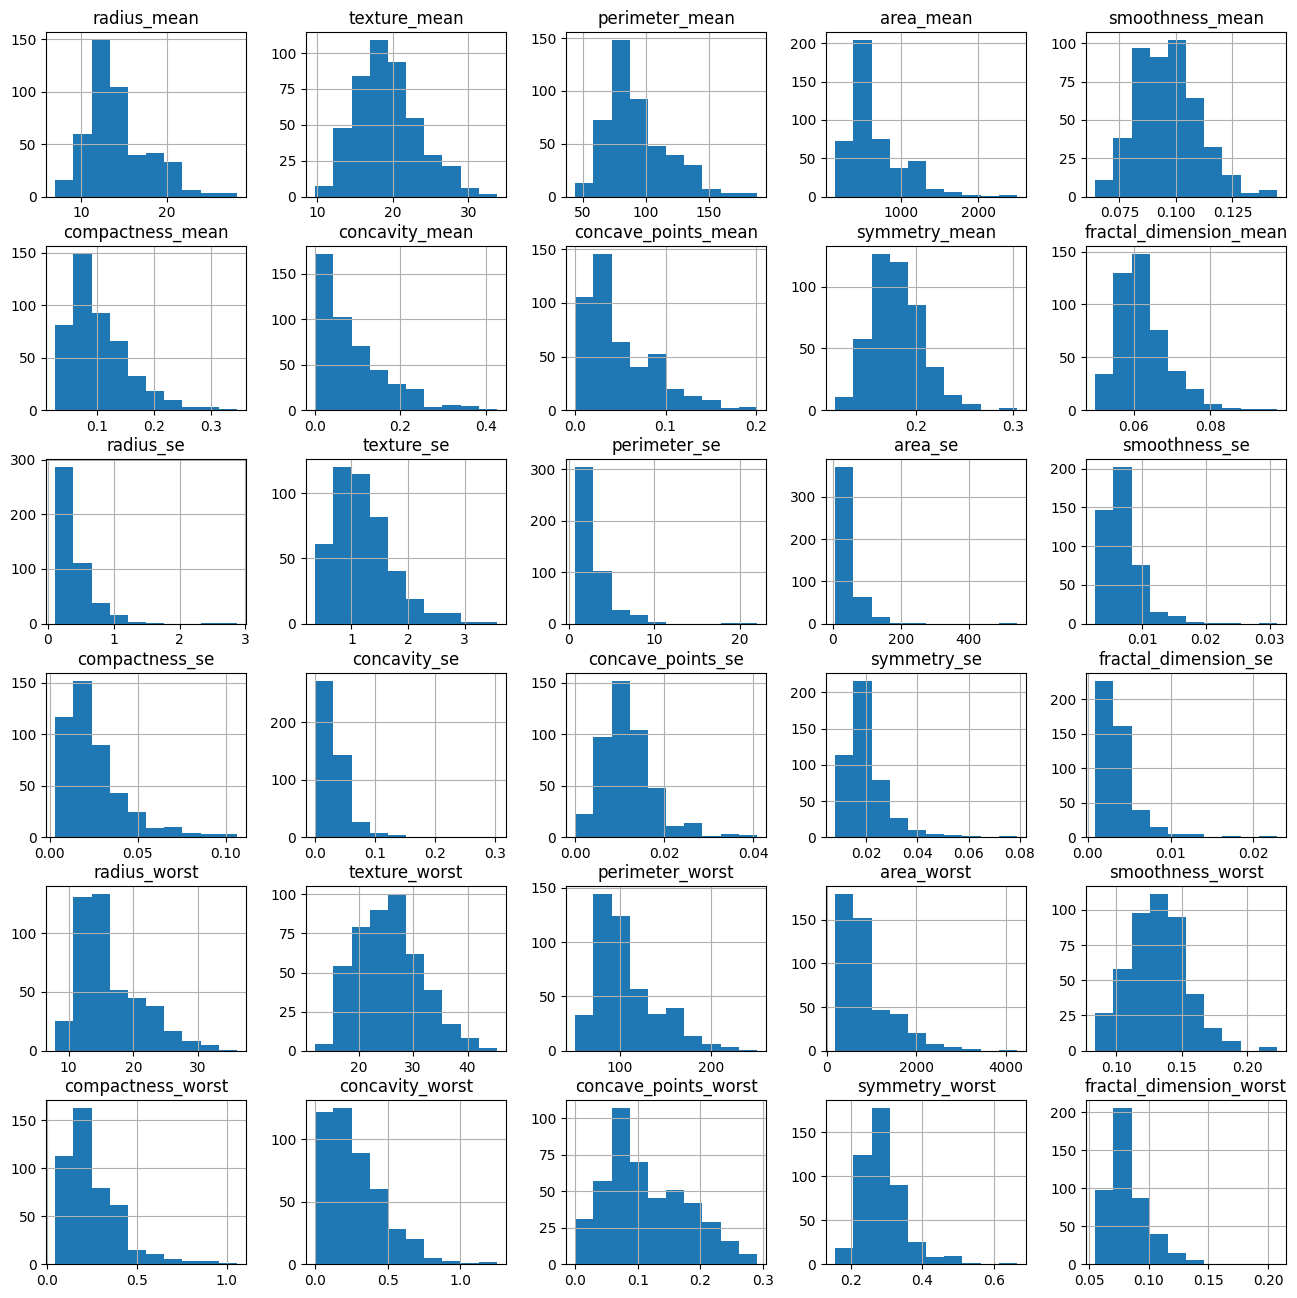

: 

In [ ]:
# Analisis univariado
df_train.hist(figsize=(16,16))
plt.show()

In [ ]:
# analisis bivariado 
sns.pairplot(data=df_train, hue='target')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(),vmin=-1, vmax=1, annot=True, cmap='RdBu') # Correlacion
plt.show()

In [ ]:
correlation_matrix = df_train.drop(columns=['target']).corr()
correlated_vars = correlation_matrix[correlation_matrix > 0.7]
correlated_pairs = correlated_vars.stack().reset_index()
correlated_pairs = correlated_pairs[correlated_pairs['level_0'] != correlated_pairs['level_1']]
correlated_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

In [ ]:
unique_variables = pd.unique(correlated_pairs[['Variable 1', 'Variable 2']].values.ravel())
highly_corr_columns = unique_variables.tolist()
highly_corr_columns

In [ ]:
X_train = df_train.drop("target", axis=1).reset_index(drop=True)
y_train = df_train["target"].reset_index(drop=True)

X_test = df_test.drop("target", axis=1).reset_index(drop=True)
y_test = df_test["target"].reset_index(drop=True)

In [ ]:
X_train.columns

In [ ]:
df_pca = df_train[highly_corr_columns].copy()
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca = X_train[highly_corr_columns].copy()
X_test_pca = X_test[highly_corr_columns].copy()
X_train_new = X_train.drop(highly_corr_columns, axis=1).copy()
X_test_new = X_test.drop(highly_corr_columns, axis=1).copy()
pca = PCA(n_components=1)
X_train_pca_t = pca.fit_transform(X_train_pca)
X_test_pca_t = pca.transform(X_test_pca)
pca.explained_variance_ratio_

In [ ]:
X_train_pca_t

In [ ]:
# Convierte las componentes principales en DataFrames
X_train_pca_df = pd.DataFrame(X_train_pca_t, columns=['PC1'], index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca_t, columns=['PC1'], index=X_test.index)


In [ ]:
X_train_final = pd.concat([X_train_new, X_train_pca_df], axis=1)
X_test_final = pd.concat([X_test_new, X_test_pca_df], axis=1)

In [ ]:
X_train_final.head()

In [ ]:
model_dt = DecisionTreeClassifier(random_state=2024)
model_dt.fit(X_train_final, y_train)
y_pred_dt = model_dt.predict(X_test_final)
accuracy_tree = accuracy_score(y_test, y_pred_dt)
f1_score_tree = f1_score(y_test, y_pred_dt)
precision_tree = precision_score(y_test, y_pred_dt)
roc_auc_score_tree = roc_auc_score(y_test, y_pred_dt)
recall_tree = recall_score(y_test, y_pred_dt)
algorithm_tree = 'Decision Tree'
print(f'{algorithm_tree}: accuracy:{accuracy_tree:.2f}, f1_score: {f1_score_tree:.2f}, precision:{precision_tree:.2f}, roc_auc:{roc_auc_score_tree:.2f} recall: {recall_tree:.2f}')

In [ ]:
model_rf = RandomForestClassifier(random_state=2024)
model_rf.fit(X_train_final, y_train)
y_pred_rf = model_rf.predict(X_test_final)
accuracy_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
algorithm_rf = 'Random Forest'
print(f'{algorithm_rf}: accuracy:{accuracy_rf:.2f}, f1_score: {f1_score_rf:.2f}, precision:{precision_rf:.2f}, roc_auc:{roc_auc_score_rf:.2f}, recall: {recall_rf:.2f}')

In [ ]:
model_gb = GradientBoostingClassifier(random_state=2024)
model_gb.fit(X_train_final, y_train)
y_pred_gb = model_gb.predict(X_test_final)
accuracy_gbc = accuracy_score(y_test, y_pred_gb)
f1_score_gbc = f1_score(y_test, y_pred_gb)
precision_gbc = precision_score(y_test, y_pred_gb)
roc_auc_score_gbc = roc_auc_score(y_test, y_pred_gb)
recall_gbc = recall_score(y_test, y_pred_gb)
algorithm_gbc = 'Gradient Boosting'
print(f'{algorithm_gbc}: accuracy:{accuracy_gbc:.2f}, f1_score: {f1_score_gbc:.2f}, precision:{precision_gbc:.2f}, roc_auc:{roc_auc_score_gbc:.2f}, recall: {recall_gbc:.2f}')

In [ ]:
comparison = pd.DataFrame({'algorithm':[], 'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[]})

In [ ]:
comparison = pd.DataFrame({'algorithm':[algorithm_tree, algorithm_rf, algorithm_gbc],
                          'accuracy':[accuracy_tree, accuracy_rf, accuracy_gbc], 
                          'roc_auc':[roc_auc_score_tree, roc_auc_score_rf, roc_auc_score_gbc],
                          'precision':[precision_tree, precision_rf, precision_gbc], 
                          'recall':[recall_tree, recall_rf, recall_gbc], 
                          'f1_score':[f1_score_tree, f1_score_rf, f1_score_gbc]})

comparison

In [ ]:
importance = permutation_importance(model_rf,X_train_final,y_train, n_repeats=10, random_state=2024)
importance_df = pd.DataFrame(importance.importances.T, columns=X_train_final.columns)
ax = importance_df.plot.box(vert=False)
ax.axvline(x=0, color='k', linestyle="--")
ax.grid(True)
ax.set_title("Permutation importance (train)")
plt.show()

In [1]:
print("Hola mundo, lol")

Hola mundo, lol
